In [1]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model
import keras

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import randint
import pandas as pd
import pickle

In [2]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

In [3]:
path = "../../Data/PlakateBayreuth"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
flowers = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            flowers.append(file.name)
            
            
            
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

2021-12-01 17:08:11.524326: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-01 17:08:11.524517: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-01 17:08:11.527289: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
data = {}
p = "../../Data/FeatureVectors"
filename = 'image_clustering.pickle'
save_path = os.path.join(p, filename)

    
try:
    with open(save_path, 'rb') as handle:
        data = pickle.load(handle)
    print("Feature Vectors loaded.")

except:
    for i, plakat in enumerate(os.listdir(path)):
        if (i % 500 == 0):
            print(f"[{i}/{len(os.listdir(path))}] processed.")
        plakat_path = os.path.join(path, plakat)
        feat = extract_features(plakat_path, model)
        data[plakat] = feat

    with open(filename, 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

Feature Vectors loaded.


In [19]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)

# get the unique labels (from the flower_labels.csv)
#df = pd.read_csv('flower_labels.csv')
#label = df['label'].tolist()
#unique_labels = list(set(label))

# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

# cluster feature vectors
kmeans = KMeans(n_clusters=15, random_state=22)
kmeans.fit(x)

KMeans(n_clusters=15, random_state=22)

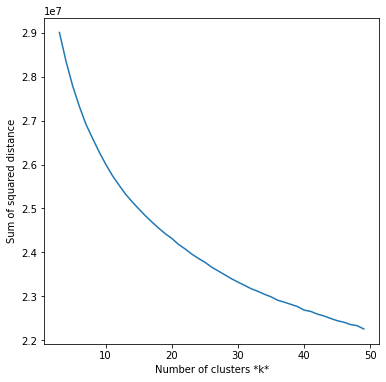

In [8]:
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

sse = []
list_k = list(range(3, 50))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)
    
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [11]:
groups

{0: ['09_neun2_216.JPG',
  '09_neun2_224.JPG',
  '09_neun2_226.JPG',
  'acht1_023.jpg',
  'acht1_030.jpg',
  'acht1_034.jpg',
  'acht1_036.jpg',
  'acht1_043.jpg',
  'acht1_049.jpg',
  'acht1_095.jpg',
  'acht1_106.jpg',
  'acht1_117.jpg',
  'acht1_154.jpg',
  'acht1_161.jpg',
  'acht1_177.jpg',
  'acht2_015.jpg',
  'acht2_030.jpg',
  'acht2_051.jpg',
  'acht2_073.jpg',
  'acht2_134.jpg',
  'acht2_153.jpg',
  'acht2_164.jpg',
  'acht2_184.jpg',
  'acht2_195.jpg',
  'acht2_200.jpg',
  'acht2_201.jpg',
  'acht2_227.jpg',
  'acht2_228.jpg',
  'acht2_230.jpg',
  'acht2_234.jpg',
  'acht2_240.jpg',
  'acht2_242.jpg',
  'acht2_243.jpg',
  'acht2_244.jpg',
  'acht2_248.jpg',
  'acht2_254.jpg',
  'acht3_185.jpg',
  'acht3_227.jpg',
  'acht3_343.jpg',
  'acht3_347.jpg',
  'acht3_348.jpg',
  'acht3_356.jpg',
  'acht4_149.jpg',
  'acht4_151.jpg',
  'acht4_227.jpg',
  'acht4_228.jpg',
  'acht4_231.jpg',
  'acht4_239.jpg',
  'acht4_247.jpg',
  'acht4_279.jpg',
  'acht5_094.jpg',
  'acht5_114.jpg',


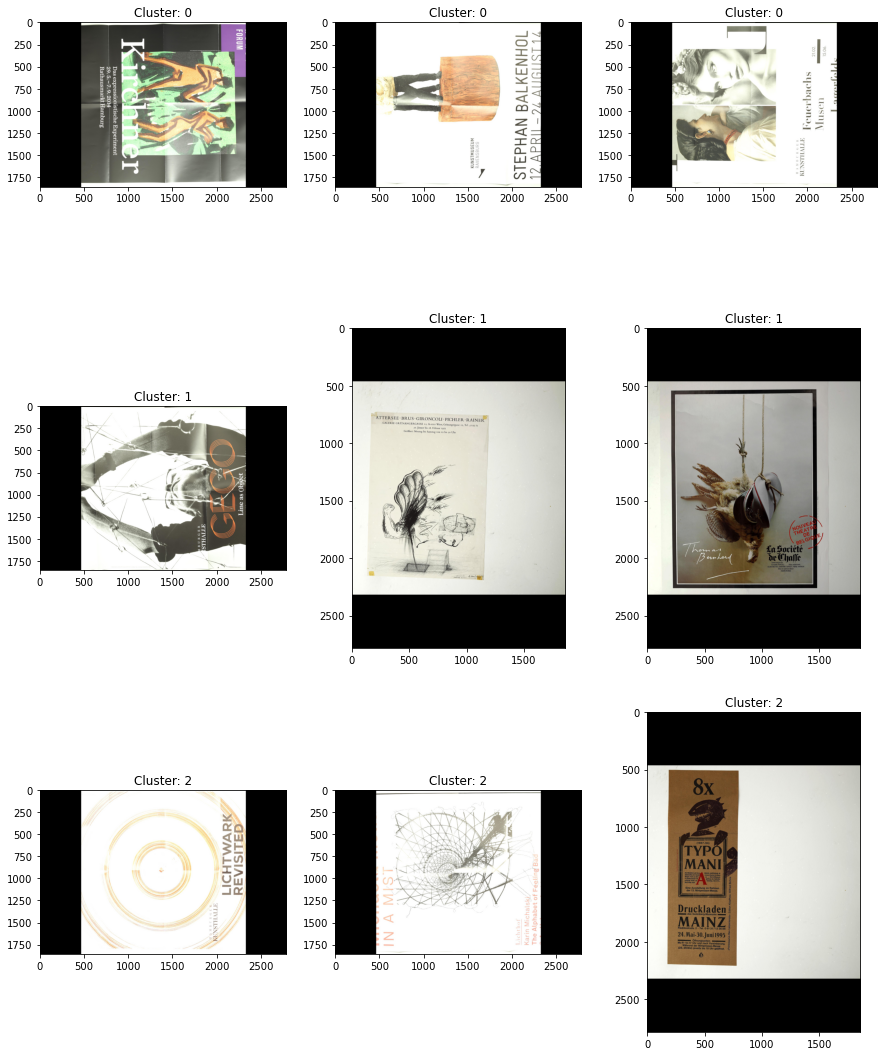

In [52]:
rows = 3
cols = 3

fig, ax = plt.subplots(rows, cols, figsize=(15,20))

for i in range(rows):
    for j in range(cols):
        img_path = os.path.join(path, groups[i][j])
        image = mpimg.imread(img_path)
        ax[i][j].imshow(image)
        ax[i][j].set_title(f"Cluster: {i+1}")